In [3]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
import jp_mpl as jplot
from itertools import cycle
import re


In [4]:
# This is the flux calculator. It has nothing to do with samples or any of that

from scipy.interpolate import interp1d
# This is to get the original flux used:
import pickle
data = pickle.load(open('/home/jp/projects/icecube/flux_unfolding/tw_neutrino_flux_wsums_original.pckl'))
numu_tot_use_y =  ((data['sum_nue'] + data['sum_nuebar'])*data['ecenters']**3 +
                   (data['sum_numu_from_p'] + data['sum_numubar_from_p'])*data['ecenters']**3 + 
                   (data['sum_numu_from_k'] + data['sum_numubar_from_k']) *data['ecenters']**3)
#numu_tot_use_y =  ((data['sum_numu_from_p'] + data['sum_numubar_from_p'])*data['ecenters']**3 + 
#                   (data['sum_numu_from_k'] + data['sum_numubar_from_k']) *data['ecenters']**3)
f2 = interp1d(data['ecenters'], numu_tot_use_y, kind='cubic' )
#energies = np.linspace(0.3, 2.9)
energies = np.linspace(1., 980., 1000)

In [5]:
true_axis = np.array([[0, 6.],[6., 10.], [10., 15.], [15., 25.],[25., 40.], [40., 63.], [63., 100.], [100., 160.], [160., 1000.]])


In [6]:
scaling_factor = 5.5

In [7]:
def readFitOutput(filename, nbins=6):
    norms = np.zeros(nbins)
    nu_fracs = np.zeros(nbins-1)
    nu_errors = np.zeros(nbins-1)
    infile = open(filename)
    for i, line in enumerate(infile):
        if i < (nbins-1):
            split_line = line.split()
            nu_fracs[i] = float(split_line[1])
            nu_errors[i] = float(split_line[2])
        if i == (nbins-1):
            split_line = re.split(' +', line)
            for j in range(1, len(split_line)):
                split_line[j] = split_line[j].replace("[", "")
                split_line[j] = split_line[j].replace("]", "")
                split_line[j] = split_line[j].replace(",", "")
                norms[j-1] = float(split_line[j])
    relative_error = nu_errors/nu_fracs

    nu_fracs = np.concatenate((nu_fracs, [1-np.sum(nu_fracs)]))
    nu_errors = np.concatenate((nu_errors, [nu_errors[-1]]))
    relative_error = np.concatenate((relative_error, [np.mean(relative_error)]))
    return norms, nu_fracs, nu_errors, relative_error

In [8]:
norms_old, nu_fracs_old, nu_errors_old, relative_error_old = readFitOutput('result_9bins2.txt', 9)

In [9]:
relative_error_old[-1] = 0.294

In [10]:
relative_error_old

array([ 0.08697375,  0.11379472,  0.11095656,  0.06744646,  0.05969356,
        0.0631922 ,  0.06881503,  0.14075522,  0.294     ])

In [11]:
# Guessing the error of the last bin

true_fractions = np.array([ 0.09270308,  0.16401043,  0.17592479,  0.20299565,  0.14962559,
        0.10061178,  0.06301955,  0.03445168,  0.01665745])
nevents = true_fractions*42000
stat_error = np.sqrt(nevents)/nevents
error_scaling = relative_error_old/stat_error
print stat_error
print error_scaling

[ 0.01602612  0.01204868  0.01163354  0.01083009  0.01261457  0.01538335
  0.01943738  0.02628876  0.0378069 ]
[ 5.42700098  9.4445767   9.53764526  6.2276923   4.7321125   4.10783093
  3.54034496  5.35419705  7.7763578 ]


In [12]:
relative_error_old[-1] = stat_error[-1]*error_scaling[-2]

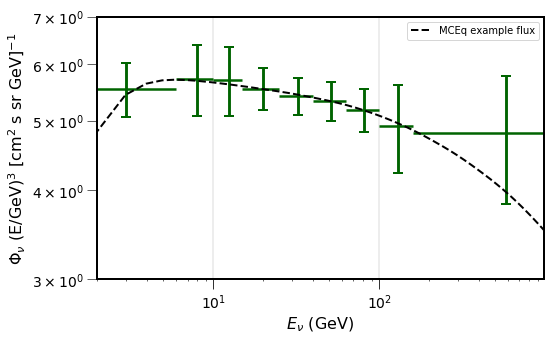

In [18]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

## The injected MCEq flux
plt.plot(energies, f2(energies)/1.03, '--k', label = 'MCEq example flux')


fit_color = 'darkgreen'
for i, one_norm in enumerate(norms_old):
    jplot.errorMark(true_axis[i], scaling_factor*norms_old[i], 
                    error = relative_error_old[i]*norms_old[i]*scaling_factor,
                    color = fit_color)
    jplot.errorMarkVert(true_axis[i], scaling_factor*norms_old[i], 
                        yerror = relative_error_old[i]*norms_old[i]*scaling_factor,
                        color = fit_color)


#plt.yscale('log')
plt.xscale('log')
plt.xlim([2, energies.max()])
plt.ylim(3., 7.)


plt.xlabel(r"$E_\nu$ (GeV)", fontsize=16)
plt.ylabel(r"$\Phi_{\nu}$ (E/GeV)$^{" + str(3) + "}$ [cm$^{2}$ s sr GeV]$^{-1}$", fontsize=16)
plt.legend(loc=0)
fig.subplots_adjust(bottom = 0.15)
fig.savefig('Tania.pdf')
fig.savefig('Tania.png')
plt.yscale('log')